In [68]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from cProfile import label

A number of functions are defined here which are used for data analysis and graphing.

The area under the stress strain curve up to a specified stress can be caluclated using one of the functions defined below. Linear interpolation is used for sparce data at higher streses.

The performance the material can be graphed for a number of $\sigma_{max}$ this is a consise summary of our data and can be used to quickly determine the most efficient foam for a given application. 


In [69]:
#Finds index of closest stress below specified stress
def find_threshold(sigmax,stress):
    i = 0 
    while sigmax > stress[i]:
        i = i + 1
    return i - 1

#Code for linear interpolation between two points
def linear_interp(stress,strain,sigmax,threshold):
    final_strain = ((strain[threshold+1]-strain[threshold]) * (sigmax-stress[threshold]) / (stress[threshold+1] - stress[threshold])) + strain[threshold]
    return final_strain

#Calculates area under graph up to specified stress
def area_up_to_sigmax(stress,strain,sigmax):
    threshold = find_threshold(sigmax,stress)
    work_strain, work_stress = strain[0:threshold] , stress[0:threshold]
    final_strain = linear_interp(stress,strain,sigmax,threshold)
    work_strain = np.append(work_strain,final_strain)
    work_stress = np.append(work_stress,sigmax)
    area = 0 
    for i in range(len(work_strain)-1):
        area += (work_strain[i+1]-work_strain[i])*(work_stress[i+1]+work_stress[i])/2
    return area,final_strain
        
#numpy code to check implementation of the trapesium rule
def simple_area(stress,strain,sigmax):
    threshold = find_threshold(sigmax,stress)
    area = np.trapz(stress[:threshold],strain[:threshold])
    return area, None

#function that finds performance for a number of stresses
def performance_vs_sigmax(stress,strain):
    sigs = np.linspace(stress[10],stress[-1],200)
    performance = np.zeros(len(sigs))
    for i in range(len(sigs)):
        performance[i] = area_up_to_sigmax(stress,strain,sigs[i])[0]
    return sigs,performance

Force displacement data is read in from csv file produced by the instron universal testing device. 

(0.0, 20.0)

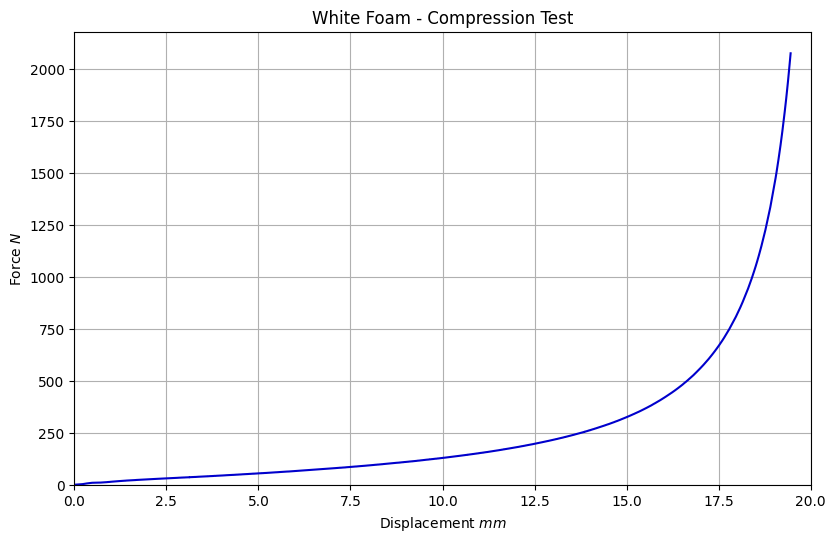

In [70]:
F_dis_white = genfromtxt('white_foam.csv',delimiter=',')
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(F_dis_white[:,0],F_dis_white[:,1],'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('Displacement $mm$')
plt.ylabel('Force $N$')
plt.title('White Foam - Compression Test')
plt.ylim(0,F_dis_white[:,1][-1]*1.05)
plt.xlim(0,20)

The force and displacment data is converted into stress and strain data using the geometry of the material and compression head. 

The following graph also illustrates the function allowing for the calculation of area up to a specified stress.

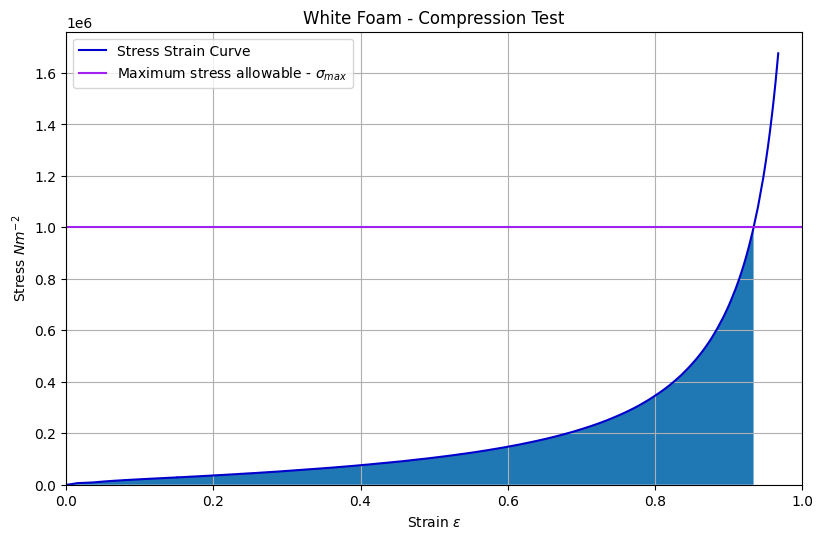

The error in the stress value by using the data point just below
0.14663111972856568%
First shows stress strain of datapoint just below desired, then the linear interpolation point
0.933841  998533.6888027143
0.9339538836050227 1000000.0
Area of graph up to sigma max
158179.00712767962


In [71]:

sigmax = 1e6
strain_white = (F_dis_white[14:,0] - 0.10827) *(1/20)
stress_white = (F_dis_white[14:,1] - 0.92613) *(1/(1237.8e-6))
threshold = find_threshold(sigmax,stress_white)
area , final_strain = area_up_to_sigmax(stress_white,strain_white,sigmax)

x = np.arange(0,1,0.001)
max_stress = np.ones(len(x))*sigmax

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_white,stress_white,'-',linewidth=1.5,color = [0, 0, 0.8],label='Stress Strain Curve')
plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.63,0.13,0.94],label = 'Maximum stress allowable - $\sigma_{max}$')
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('White Foam - Compression Test')
plt.ylim(0,1.05*stress_white[-1])
plt.xlim(0,1)
plt.fill_between(strain_white,stress_white, where=(strain_white <= final_strain))
plt.legend()
#plt.savefig('WhiteFoam_compression.png')
plt.show()

print('The error in the stress value by using the data point just below')
print(str(100*(sigmax - stress_white[threshold])/(sigmax)) + '%')
print('First shows stress strain of datapoint just below desired, then the linear interpolation point')
print(str(strain_white[threshold]) + '  ' +  str(stress_white[threshold]))
print(final_strain,sigmax)
print('Area of graph up to sigma max')
print(area)


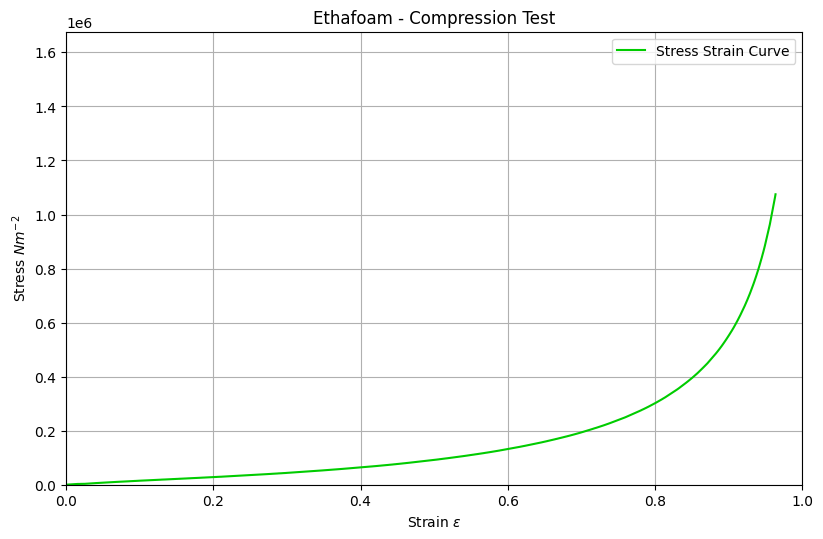

154255.00397387572


In [72]:
F_dis_etha = genfromtxt('Ethafoam.csv',delimiter=',')

strain_etha = (F_dis_etha[21:,0]-0.06648) *(1/27)
stress_etha = (F_dis_etha[21:,1]-0.97544) *(1/(2.0228e-3))
threshold = find_threshold(sigmax,stress_etha)
area , final_strain = area_up_to_sigmax(stress_etha,strain_etha,sigmax)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_etha,stress_etha,'-',linewidth=1.5,color = [0, 0.8, 0],label='Stress Strain Curve')
#plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0],label = 'Maximum stress allowable - $\sigma_{max}$')
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('Ethafoam - Compression Test')
plt.ylim(0,stress_white[-1])
plt.xlim(0,1)
#plt.fill_between(strain_etha,stress_etha, where=(strain_etha <= final_strain))
plt.legend()
#plt.savefig('Ethafoam_compression.png')
plt.show()
print(area)

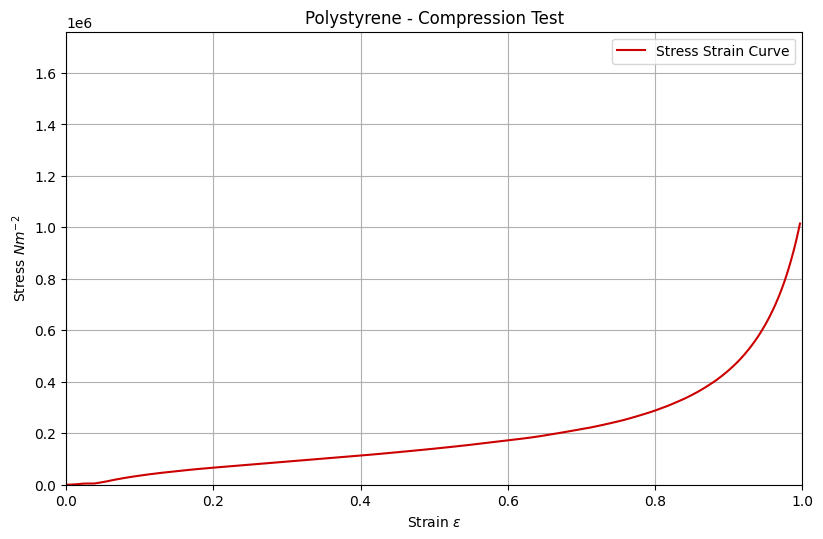

194219.03665911697


In [73]:
F_dis_sty = genfromtxt('Polystyrene.csv',delimiter=',')

strain_sty = (F_dis_sty[54:,0] - 0.35196) *(1/13.5)
stress_sty = (F_dis_sty[54:,1]-1.17902) *(1/(2.0228e-3)) 
threshold = find_threshold(sigmax,stress_sty)
area , final_strain = area_up_to_sigmax(stress_sty,strain_sty,sigmax)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_sty,stress_sty,'-',linewidth=1.5,color = [0.8, 0, 0],label='Stress Strain Curve')
#plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0],label = 'Maximum stress allowable - $\sigma_{max}$')
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('Polystyrene - Compression Test')
plt.ylim(0,1.05*stress_white[-1])
plt.xlim(0,1)
#plt.fill_between(strain_sty,stress_sty, where=(strain_sty <= final_strain))
plt.legend()
#plt.savefig('Polystyrene_compression.png')
plt.show()
print(area)

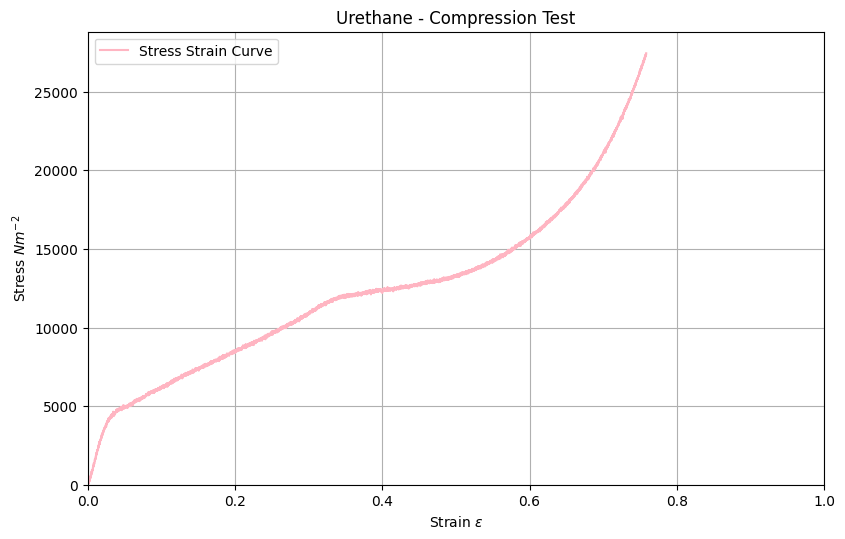

194219.03665911697


In [74]:
F_dis_ure = genfromtxt('Urethane.csv',delimiter=',')

strain_ure = (F_dis_ure[205:,0]-0.67988) *(1/25.1)
stress_ure = (F_dis_ure[205:,1]-0.71287) *(1/(2.0228e-3)) 
threshold = find_threshold(sigmax,stress_sty)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_ure,stress_ure,'-',linewidth=1.5,color = [1, 0.71, 0.76],label='Stress Strain Curve')
#plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0],label = 'Maximum stress allowable - $\sigma_{max}$')
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('Urethane - Compression Test')
plt.ylim(0,1.05*stress_ure[-1])
plt.xlim(0,1)
#plt.fill_between(strain_sty,stress_sty, where=(strain_sty <= final_strain))
plt.legend()
#plt.savefig('Urethane_compression.png')
plt.show()
print(area)

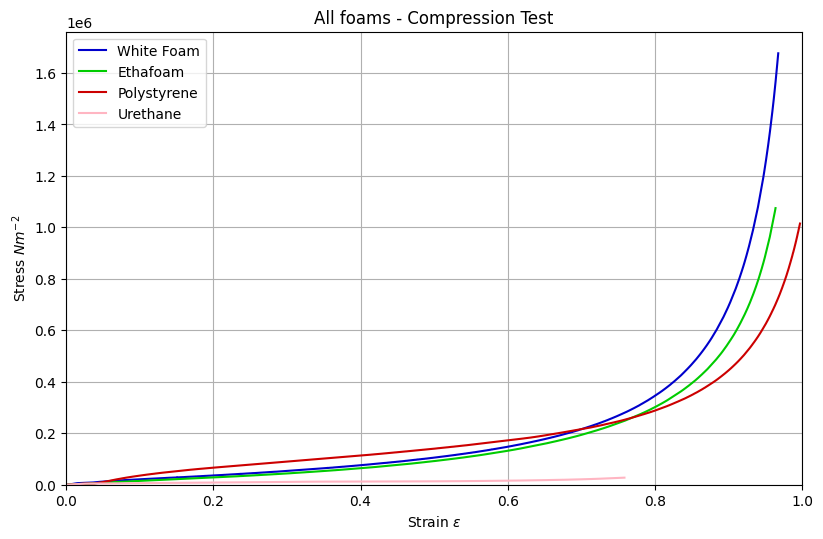

In [75]:
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_white,stress_white,'-',linewidth=1.5,color = [0, 0, 0.8],label='White Foam')
plt.plot(strain_etha,stress_etha,'-',linewidth=1.5,color = [0, 0.8, 0],label='Ethafoam')
plt.plot(strain_sty,stress_sty,'-',linewidth=1.5,color = [0.8, 0, 0],label='Polystyrene')
plt.plot(strain_ure,stress_ure,'-',linewidth=1.5,color = [1, 0.71, 0.76],label='Urethane')
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('All foams - Compression Test')
plt.ylim(0,1.05*stress_white[-1])
plt.xlim(0,1)
plt.legend()
#plt.savefig('All_compression.png')
plt.show()

The performance graphs show the area under the curve up to a certain allowable stress ($\sigma_{max}$) for that given allowable stress.

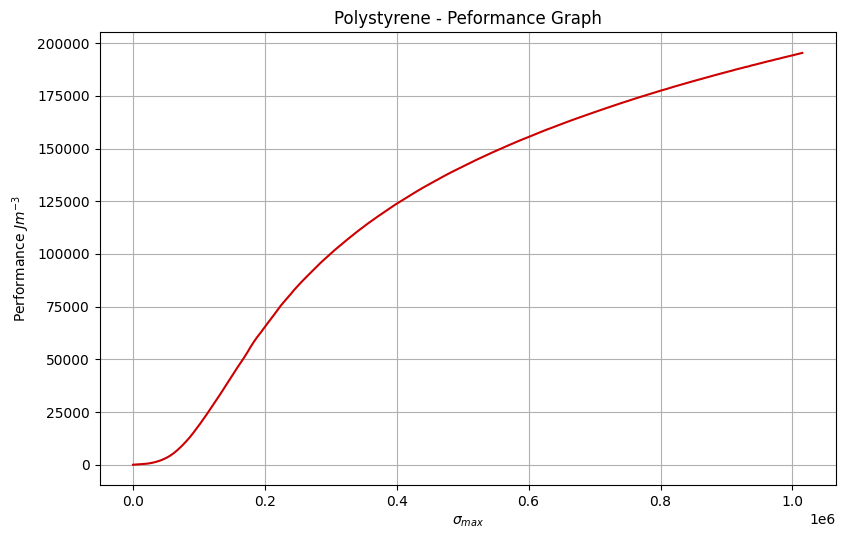

In [76]:
sigs_sty, performance_sty = performance_vs_sigmax(stress_sty,strain_sty)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_sty,performance_sty,'-',linewidth=1.5,color = [0.8, 0, 0])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Polystyrene - Peformance Graph')
plt.show()

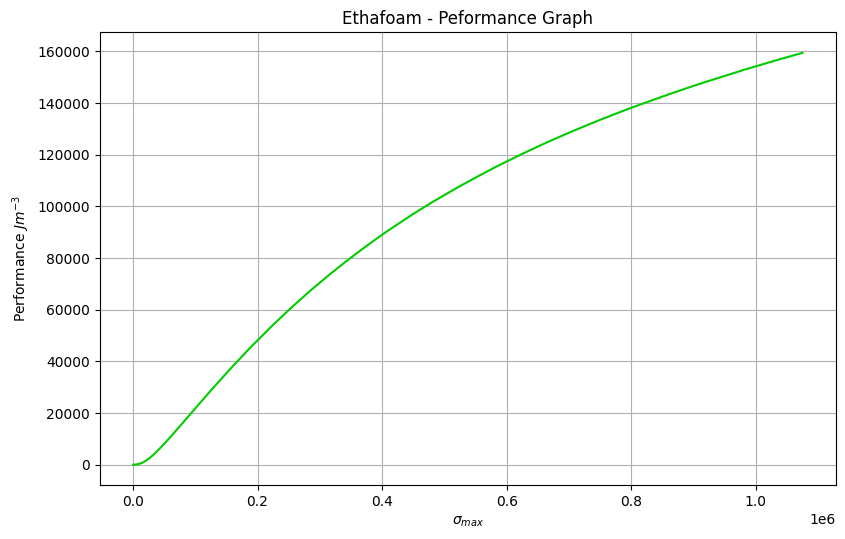

In [77]:
sigs_etha, performance_etha = performance_vs_sigmax(stress_etha,strain_etha)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_etha,performance_etha,'-',linewidth=1.5,color = [0, 0.8, 0])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Ethafoam - Peformance Graph')
plt.show()


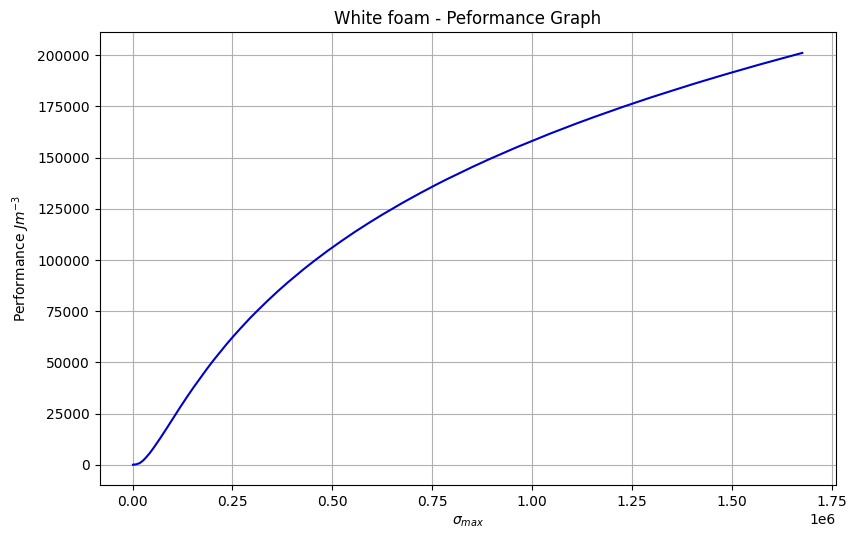

In [78]:
sigs_white, performance_white = performance_vs_sigmax(stress_white,strain_white)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_white,performance_white,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('White foam - Peformance Graph')
plt.show()

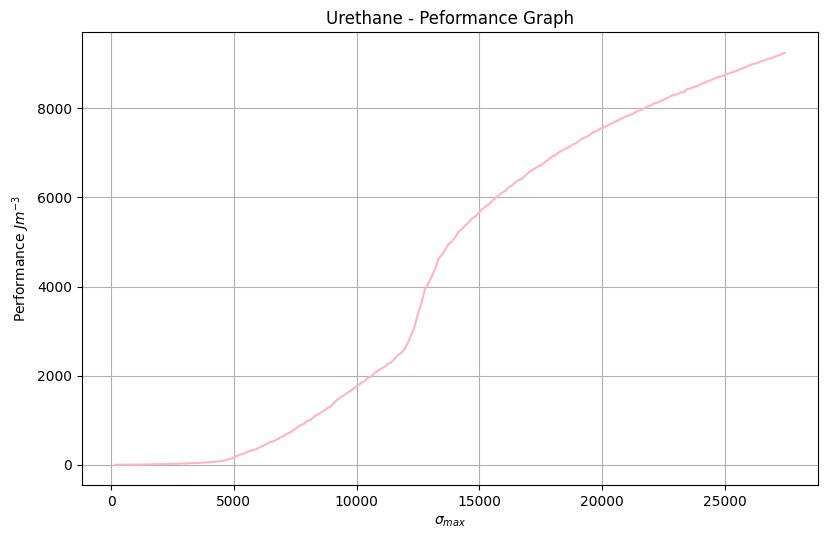

In [79]:
sigs_ure, performance_ure = performance_vs_sigmax(stress_ure,strain_ure)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_ure,performance_ure,'-',linewidth=1.5,color = [1, 0.71, 0.76])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Urethane - Peformance Graph')
plt.show()

Performance for each material is shown on a single referencable graph.

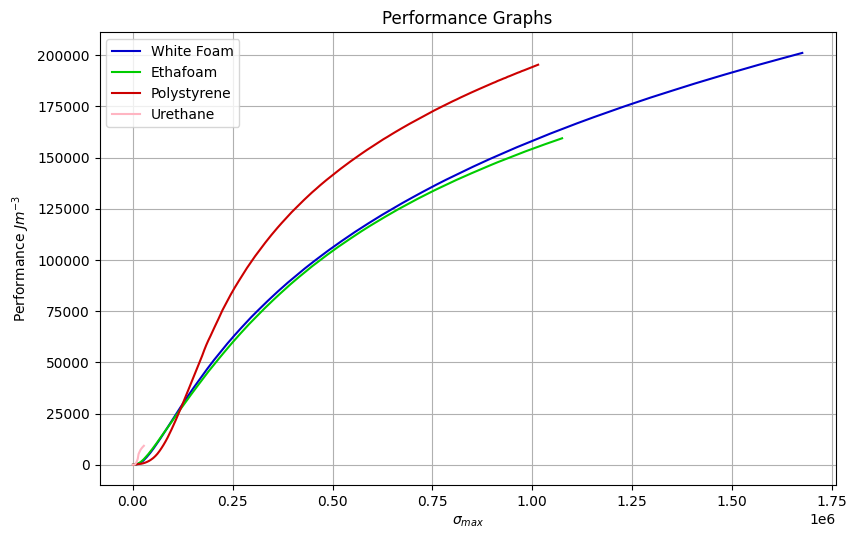

In [80]:
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_white,performance_white,'-',linewidth=1.5,color = [0, 0, 0.8],label= 'White Foam')
plt.plot(sigs_etha,performance_etha,'-',linewidth=1.5,color = [0, 0.8, 0],label = 'Ethafoam')
plt.plot(sigs_sty,performance_sty,'-',linewidth=1.5,color = [0.8, 0, 0],label='Polystyrene')
plt.plot(sigs_ure,performance_ure,'-',linewidth=1.5,color = [1, 0.71, 0.76],label='Urethane')
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Performance Graphs')
plt.legend()
#plt.savefig('All_performance.png')
plt.show()